In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt

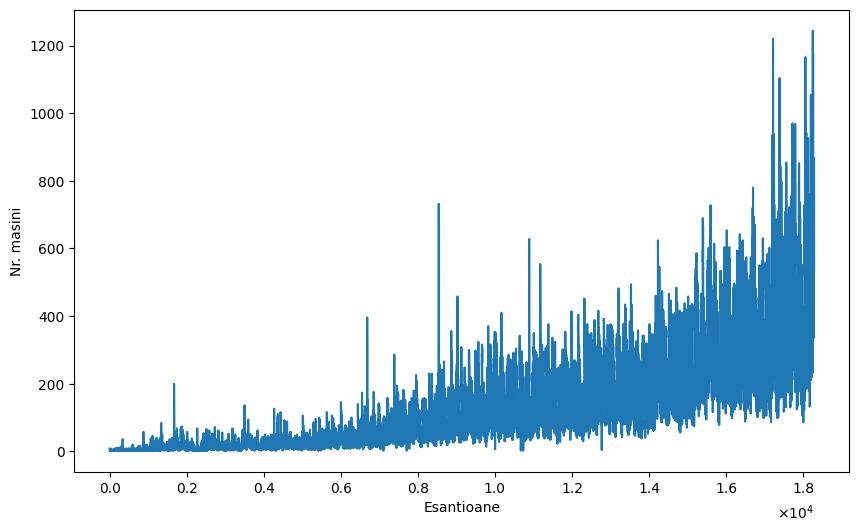

In [3]:
data = np.genfromtxt('Train.csv', delimiter=',', skip_header=1)

car_counts = data[:, -1]

time_hours = np.arange(car_counts.size)

plt.figure(figsize=(10, 6))
plt.plot(time_hours, car_counts)
plt.xlabel('Esantioane')
plt.ylabel('Nr. masini')
xticks = np.arange(0, time_hours[-1], 0.2 * 10**4)
plt.xticks(xticks, [f"{label/10**4:.1f}" for label in xticks])
plt.text(time_hours[-1], -200, r'$\times10^4$', fontsize=10, ha='right')
plt.show()


In [4]:
total_hours = time_hours[-1] - time_hours[0]

total_days, remaining_hours = divmod(total_hours, 24)

print(f"Numar de zile: {total_days} si {remaining_hours} ore, {total_hours} de ore in total.")

Numar de zile: 761 si 23 ore, 18287 de ore in total.


In [23]:
sampling_frequency_hz = 1 / 3600  

nyquist_frequency_hz = sampling_frequency_hz / 2

print(f"Frecventa maxima prezenta in semnal: {nyquist_frequency_hz:.6f} Hz")


Frecventa maxima prezenta in semnal: 0.000139 Hz


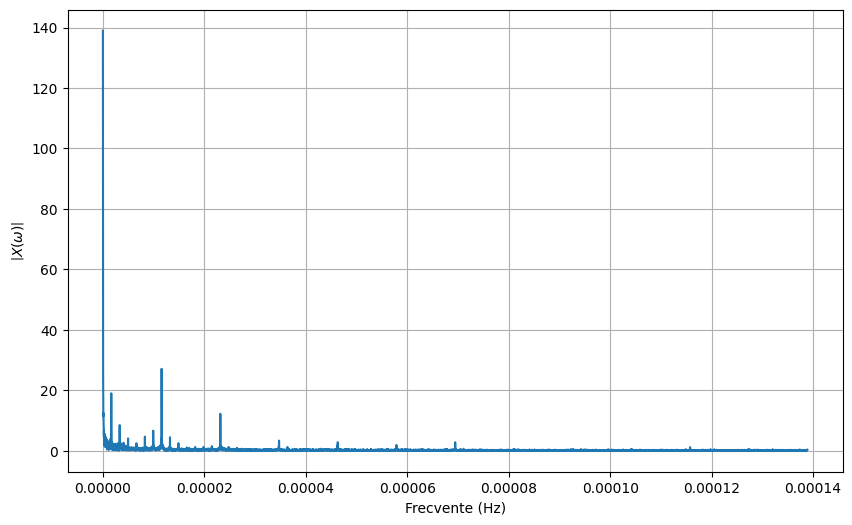

array([138.95811461,  66.85385766,  35.21917298, ...,   0.39618267,
         0.41367487,   0.37676309])

In [6]:
X = np.fft.fft(car_counts)

N = len(car_counts)
X = np.abs(X / N)
 
X = X[:N // 2]

Fs = sampling_frequency_hz  
f = Fs * np.linspace(0, N/2, N//2) / N

plt.figure(figsize=(10, 6))
plt.plot(f, X)
plt.xlabel('Frecvente (Hz)')
plt.ylabel(r'$\left|X(\omega)\right|$')
plt.grid(True)
plt.show()

X

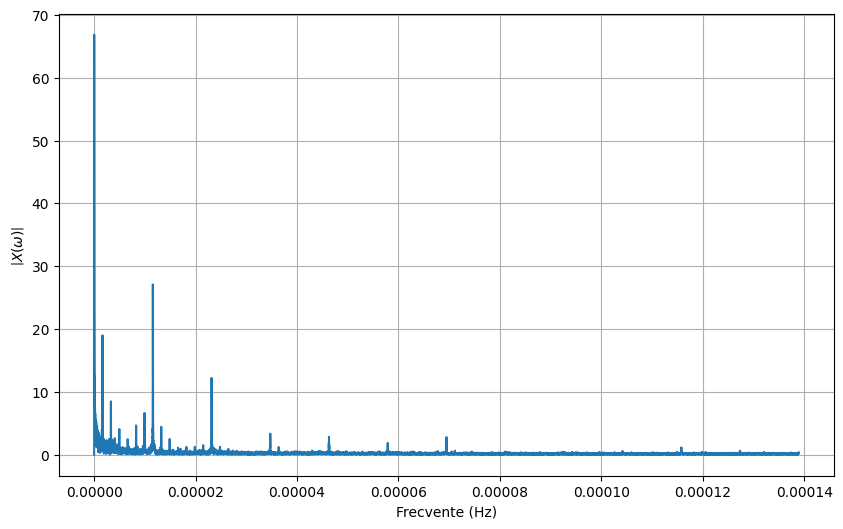

In [7]:
DC_component = X[0]

if DC_component != 0:
    X_no_DC = X.copy()
    X_no_DC[0] = 0
    plt.figure(figsize=(10, 6))
    plt.plot(f, X_no_DC)
    plt.xlabel('Frecvente (Hz)')
    plt.ylabel(r'$\left|X(\omega)\right|$')
    plt.grid(True)
    plt.show()
else:
    print("Semnalul nu contine componenta continua.")

In [8]:
X__no_DC = np.abs(X_no_DC) / N

freq = np.fft.fftfreq(N, 1/sampling_frequency_hz)

X_no_DC = X__no_DC[: N // 2]
frequencies_half = freq[: N // 2]

peaks = np.argsort(X__no_DC)[-4:]

frequencies = frequencies_half[peaks]

frequencies

array([4.55672208e-08, 1.15740741e-05, 3.03781472e-08, 1.51890736e-08])

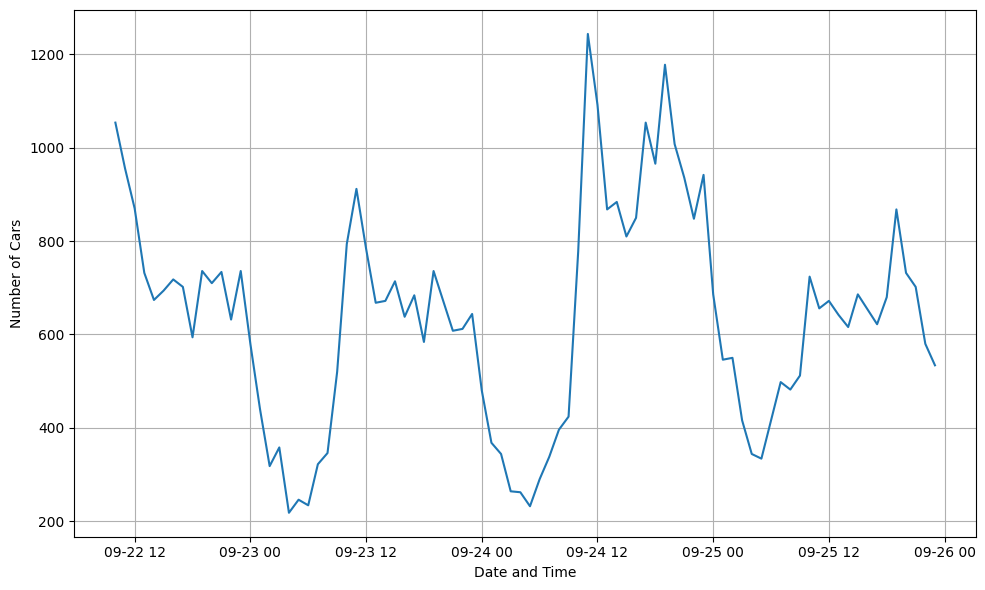

In [22]:
df = pd.read_csv('Train.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')

condition = car_counts > 1000
date_condition = df['Datetime'][condition]

first_monday = date_condition[date_condition.dt.weekday == 0].iloc[0]

first_monday_index = df[df['Datetime'] == first_monday].index[0]

month_data = df.iloc[first_monday_index:first_monday_index + 24*30] 

plt.figure(figsize=(10, 6))
plt.plot(month_data['Datetime'], month_data['Count'])
plt.xlabel('Zi si ora')
plt.ylabel('Nr. masini')
plt.tight_layout()
plt.grid(True)
plt.show()

h) O abordare este identificarea tiparelor obisnuite in date, cum ar fi cresterea numarului de masini in timpul orelor de varf potentiale sau scaderea numarului in ceea ce ar putea fi weekend-uri. Potrivirea acestor tipare cu evenimente publice cunoscute sau sarbatori poate oferi, de asemenea, indicii. De exemplu, o scadere vizibila a traficului intr-o zi care se aliniaza cu o sarbatoare majora precum Craciunul ar putea fi semnificativa.

Cu toate acestea, aceasta metoda nu este sigura. Factori precum lucrarile rutiere neasteptate pot modifica tiparele de trafic, ceea ce face dificila stabilirea datei exacte de incepere. De asemenea, un eveniment unic (evenimente sportive, sarbatorirea unei situatii exceptionale) care afectează semnificativ semnalul poate duce la o interpretare falsă a datei de începere. Tendinta generala ar putea fi clara, dar detaliile exacte ar putea ramane evazive.

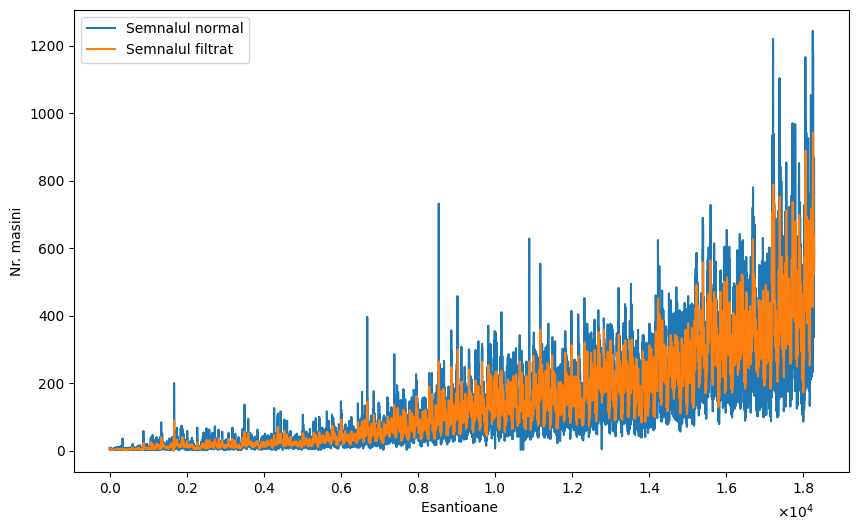

In [32]:
cutoff_frequency_hz = 1 / (24 * 3600)

b, a = butter(N=5, Wn=cutoff_frequency_hz / nyquist_frequency_hz, btype='low', analog=False)

filtered_signal = filtfilt(b, a, car_counts)

plt.figure(figsize=(10, 6))
plt.plot(car_counts, label='Semnalul normal')
plt.plot(filtered_signal,label='Semnalul filtrat')
plt.legend()
plt.xlabel('Esantioane ')
plt.ylabel('Nr. masini')
xticks = np.arange(0, time_hours[-1], 0.2 * 10**4)
plt.xticks(xticks, [f"{label/10**4:.1f}" for label in xticks])
plt.text(time_hours[-1], -200, r'$\times10^4$', fontsize=10, ha='right')
plt.show()